In [79]:
import pandas as pd
import spacy
from sklearn.manifold import TSNE
from random import sample
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,30)

In [4]:
nlp = spacy.load('en_core_web_lg')

In [5]:
wordTable = pd.read_hdf('census-wordlist.hdf')

In [104]:
wordTable['numPeople'] = wordTable['numPeople'].apply(lambda x: int(x))

In [105]:
wordTable

,sex,age,occupation,numPeople,reg,synonym_list,additional_synonyms
0,female,o20,Egg-merchant and Dealer,37,"Egg merchant,Egg dealer","[Egg merchant, Egg dealer]",[]
1,female,u19,Egg-merchant and Dealer,3,"Egg merchant,Egg dealer","[Egg merchant, Egg dealer]",[]
2,male,o20,Egg-merchant and Dealer,136,"Egg merchant,Egg dealer","[Egg merchant, Egg dealer]",[]
3,male,u19,Egg-merchant and Dealer,10,"Egg merchant,Egg dealer","[Egg merchant, Egg dealer]",[]
4,female,o20,Embosser,14,Embosser,[Embosser],[]
5,female,u19,Embosser,4,Embosser,[Embosser],[]
6,male,o20,Embosser,54,Embosser,[Embosser],[]
7,male,u19,Embosser,6,Embosser,[Embosser],[]
8,female,o20,Embroiderer,593,Embroiderer,[Embroiderer],[embroiderer]
9,female,u19,Embroiderer,209,Embroiderer,[Embroiderer],[embroiderer]


In [172]:
grouped = wordTable.groupby('reg').sum()

In [173]:
popularOccupationsTable = grouped[grouped['numPeople'] > 1000]

In [175]:
list(popularOccupationsTable.index)

['Accountant',
 'Actor',
 'Agent,Factor',
 'Agricultural implement maker',
 'Agricultural labourer',
 'Anchor smith,Chain maker',
 'Architect',
 'Artificial flower maker',
 'Artist',
 'Attorney,Solicitor,Writer,Law student',
 'Auctioneer,Appraiser,House Agent',
 'Baker',
 'Banker',
 'Barrister,Advocate,Conveyancer',
 'Basket maker',
 'Beer shop keeper',
 'Blacksmith',
 'Bleacher',
 'Block cutter,Printer cutter',
 'Block maker, Mast maker,Oar maker',
 'Boat builder,Barge builder',
 'Boatman,Bargeman,Boatwoman,Bargewoman',
 'Bobbin maker,Bobbin turner',
 'Boiler maker',
 'Bonnet maker',
 'Bookseller,Bookbinder,Publisher',
 'Boot maker,Shoe maker',
 'Brass founder,Brass moulder',
 'Brazier,Brass finisher,Brass worker,Tinker',
 'Brewer',
 'Brick maker,Tile maker',
 'Bricklayer',
 'Broker',
 'Brush maker,Broom maker',
 'Builder',
 'Butcher',
 'Button maker',
 'Cabinet maker,Cabinet upholsterer',
 'Calico and cotton dyer',
 'Cap maker,Cap dealer',
 'Card maker',
 'Carpenter,Joiner',
 'Carpet

In [176]:
popularOccupationsList = list(popularOccupationsTable.index)

In [179]:
popularOccupationsListClean = []
for item in popularOccupationsList:
    items = item.split(',')
    for newitem in items:
        popularOccupationsListClean.append(newitem.strip())

In [180]:
popularOccupationsListClean

['Accountant',
 'Actor',
 'Agent',
 'Factor',
 'Agricultural implement maker',
 'Agricultural labourer',
 'Anchor smith',
 'Chain maker',
 'Architect',
 'Artificial flower maker',
 'Artist',
 'Attorney',
 'Solicitor',
 'Writer',
 'Law student',
 'Auctioneer',
 'Appraiser',
 'House Agent',
 'Baker',
 'Banker',
 'Barrister',
 'Advocate',
 'Conveyancer',
 'Basket maker',
 'Beer shop keeper',
 'Blacksmith',
 'Bleacher',
 'Block cutter',
 'Printer cutter',
 'Block maker',
 'Mast maker',
 'Oar maker',
 'Boat builder',
 'Barge builder',
 'Boatman',
 'Bargeman',
 'Boatwoman',
 'Bargewoman',
 'Bobbin maker',
 'Bobbin turner',
 'Boiler maker',
 'Bonnet maker',
 'Bookseller',
 'Bookbinder',
 'Publisher',
 'Boot maker',
 'Shoe maker',
 'Brass founder',
 'Brass moulder',
 'Brazier',
 'Brass finisher',
 'Brass worker',
 'Tinker',
 'Brewer',
 'Brick maker',
 'Tile maker',
 'Bricklayer',
 'Broker',
 'Brush maker',
 'Broom maker',
 'Builder',
 'Butcher',
 'Button maker',
 'Cabinet maker',
 'Cabinet uph

In [68]:
wordList = set([item for sublist in list(wordTable.synonym_list) for item in sublist])

In [90]:
synonymList = set([item for sublist in list(wordTable.additional_synonyms) for item in sublist])

In [93]:
occupationList = list(wordList) + list(synonymList)

In [101]:
def getNumPeople(occupation):
    first = wordTable[wordTable['synonym_list'].apply(lambda x: occupation in x)]['numPeople'].sum()
    if first == 0: 
        return wordTable[wordTable['additional_synonyms'].apply(lambda x: occupation in x)]['numPeople'].sum()
    else:
        return first

In [213]:
def percentFemale(occupation):
    numFemale = wordTable[wordTable['synonym_list']
                    .apply(lambda x: occupation in x)]\
                    .where(wordTable['sex'] == 'female')['numPeople'].sum()
    if numFemale == 0: 
        numFemale = wordTable[wordTable['additional_synonyms']
                    .apply(lambda x: occupation in x)]\
                    .where(wordTable['sex'] == 'female')['numPeople'].sum()
    numMale = wordTable[wordTable['synonym_list']
                        .apply(lambda x: occupation in x)]\
                        .where(wordTable['sex'] == 'male')['numPeople'].sum()
    if numMale == 0:
        numMale = wordTable[wordTable['additional_synonyms']
                        .apply(lambda x: occupation in x)]\
                        .where(wordTable['sex'] == 'male')['numPeople'].sum()
    if numFemale+numMale == 0: 
        return 0
    return (numFemale/(numFemale+numMale))

In [133]:
occupationPeopleDict = {occupation: getNumPeople(occupation) for occupation in occupationList}

In [181]:
popOccupationPeopleDict = {occupation: getNumPeople(occupation) for occupation in popularOccupationsListClean}

In [134]:
percentFemale('Embroiderer')

0.95249406175771967

In [ ]:
for item in sorted(occupationPeopleDict, key=occupationPeopleDict.get, reverse=True):
    print(item, occupationPeopleDict[item])

In [115]:
maxPeople = 914707

In [69]:
len(wordList)

1275

In [70]:
wordList

{'Army clothier',
 'Fruit merchant',
 'Bell hanger',
 'Fur dyer',
 'Shot belt maker',
 'Shot dealer',
 'Letter carrier',
 'Wool agent',
 'Lamp black maker',
 'Skewer maker',
 'Taxwoman',
 'Ice dealer',
 'Map publisher',
 'Merchant',
 'Rivet maker',
 'Tassel maker',
 'Tallow chandler',
 'Hair manufacturer',
 'Scourer',
 'Engine turner',
 'Provision dealer',
 'Quill cutter',
 'Parliamentary agent',
 'Ship rigger',
 'Soda manufacturer',
 'Surgeon',
 'Chemist',
 'Ship stewardess',
 'Water gilder',
 'Telegraph keeper',
 'Burnisher',
 'Colonial broker',
 'Artist',
 'Copper plate worker',
 'Perfumer',
 'Mould maker',
 'Timber agent',
 'Milliner',
 'Dancing teacher',
 'Tobacco pipe maker',
 'Small ware manufacturer',
 'Nail manufacture',
 'Straw plait merchant',
 'Hosier',
 'Surgical insturment maker',
 'Archery goods dealer',
 'Barge builder',
 'Pole dealer',
 'Furrier',
 'Straw bonnet maker',
 'Lime dealer',
 'Copper miner',
 'Stock maker',
 'Rule maker',
 'Lace dealer',
 'Coal meter',
 'Fla

In [71]:
wordListSample = sample(wordList, 1000)

In [200]:
#wordDocs = [nlp(w) for w in wordListSample]
wordDocs = [nlp(w) for w in popularOccupationsListClean]

In [201]:
wordVecs = [w.vector for w in wordDocs]
wordLabels = [w.text for w in wordDocs]

In [202]:
#numPeople = [getNumPeople(word)/maxPeople for word in wordListSample]
numPeople = [getNumPeople(word)/maxPeople for word in popularOccupationsListClean]

In [236]:
genderBalance = [percentFemale(word) for word in popularOccupationsListClean]

In [237]:
len(genderBalance)

416

In [238]:
len(numPeople)

416

In [203]:
# Scale this so it can be used for point sizes in matplotlib.
sizes = [n*1000 for n in numPeople]

In [204]:
df = pd.DataFrame(wordVecs, index=wordLabels)

In [205]:
tsne = TSNE(n_components=2, random_state=0)

In [206]:
tsneOut = tsne.fit_transform(df)

In [207]:
tsneOut.shape

(416, 2)

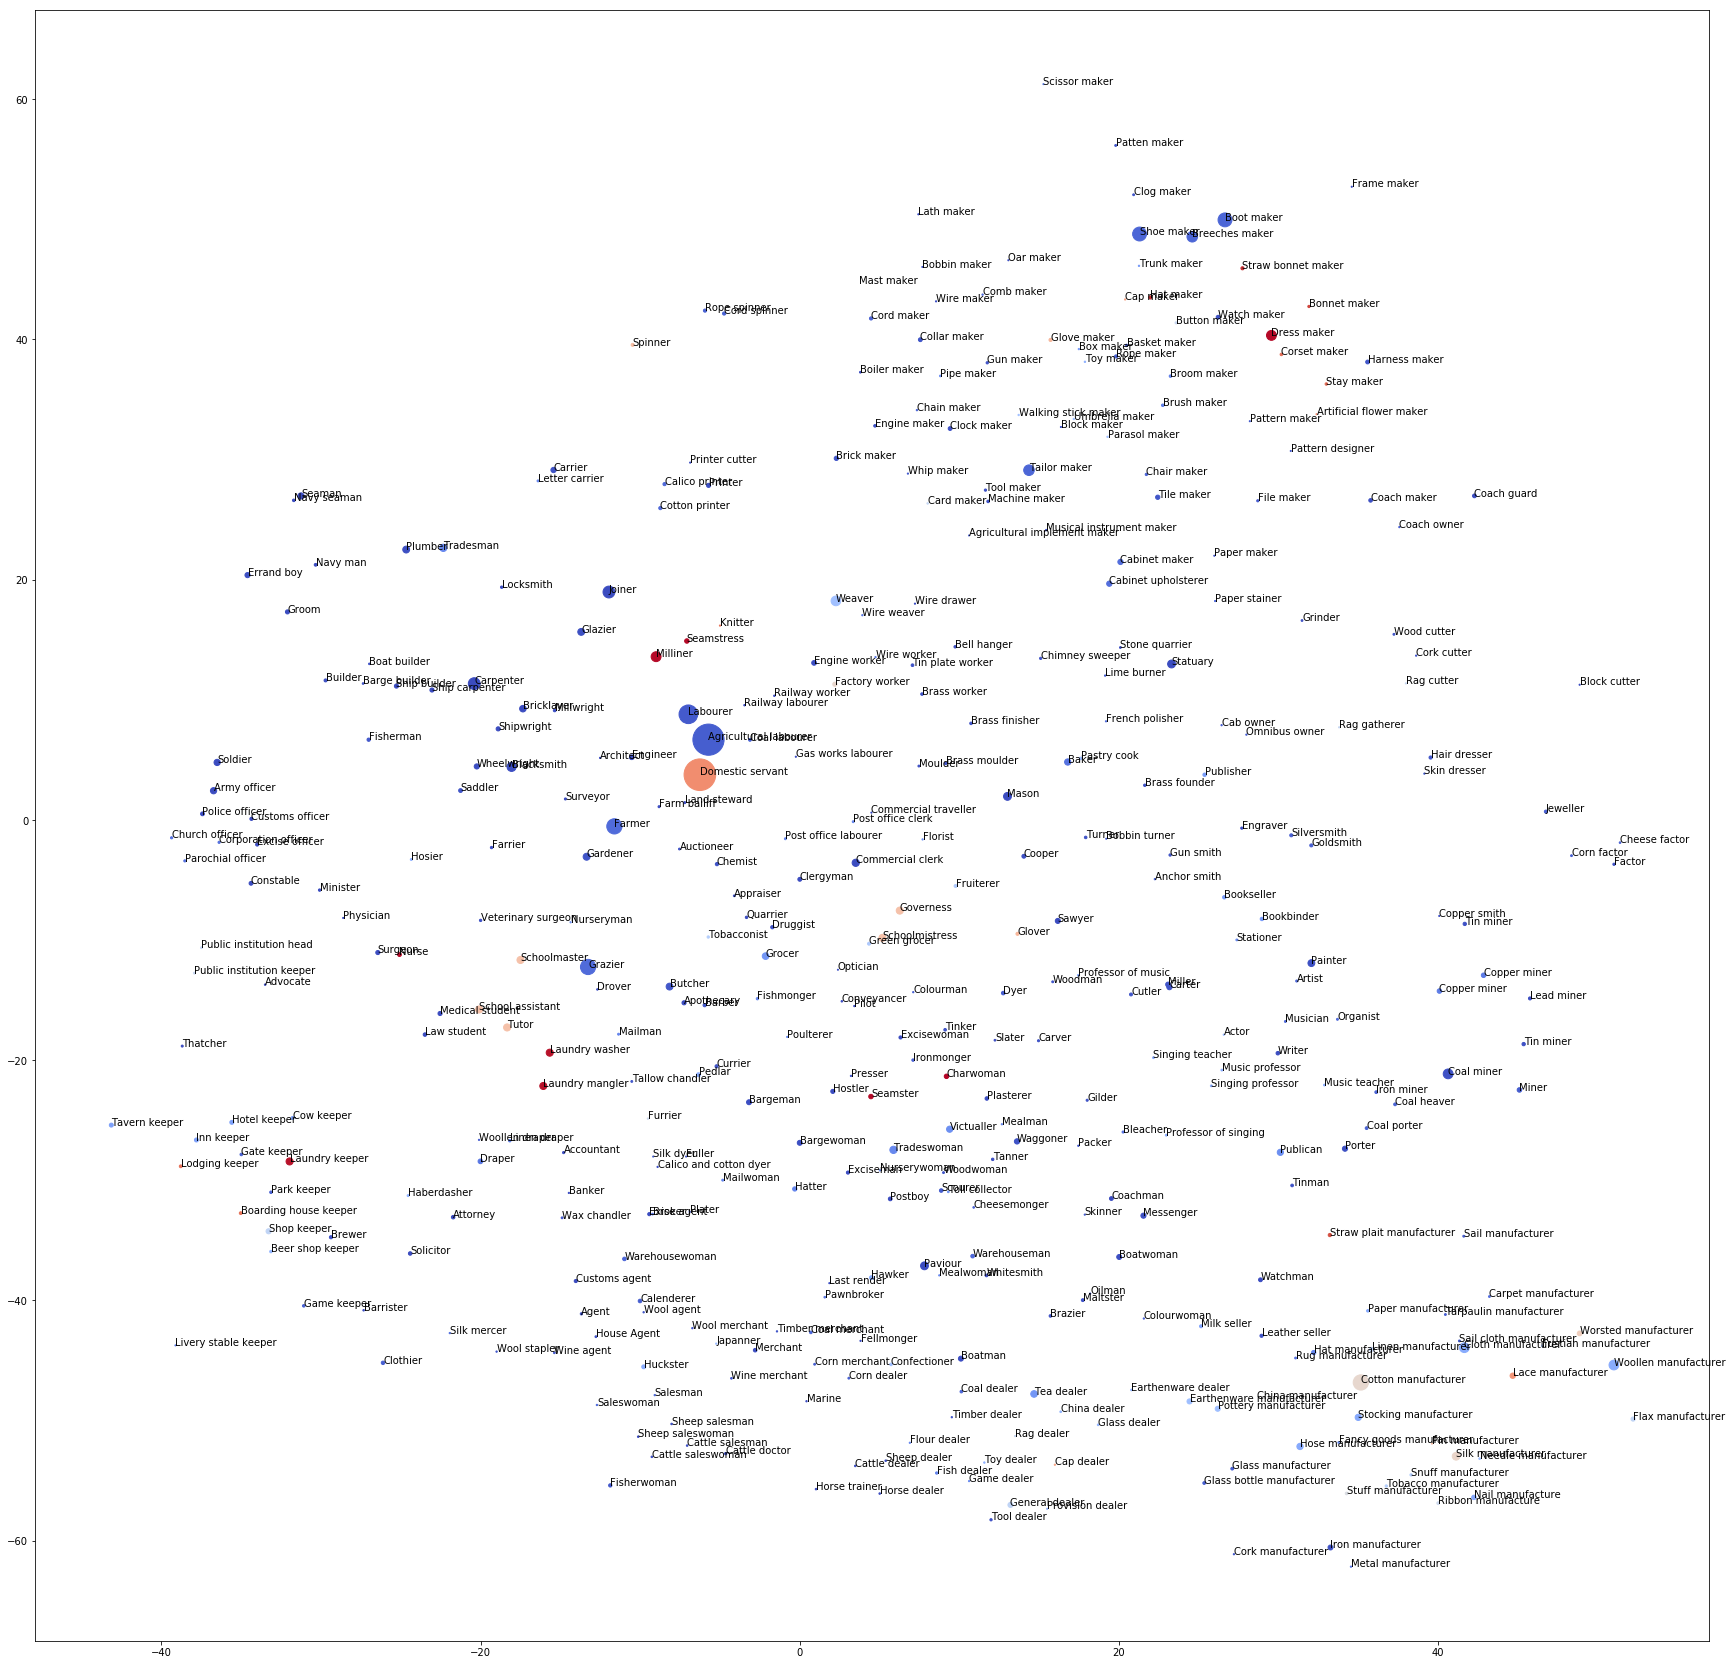

In [240]:
plt.scatter(tsneOut[:,0], tsneOut[:,1], s=sizes, cmap='coolwarm', c=genderBalance)
for label, x, y in zip(wordLabels, tsneOut[:, 0], tsneOut[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')